In [659]:
import numpy
import pandas
import matplotlib.pyplot as plt
import matplotlib
import time
from datetime import datetime
import  matplotlib.ticker as ticker
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'

In [660]:
status_list = pandas.read_csv('/home/amigos/data/experiments/status_monitor/20181113_103351.txt', sep=' ', header=None,names=['time','CH1','CH2','CH3','CH4','CH5','CH6','CH7','CH8','vacuum','temperture','humidity'])

In [661]:
#日付
d = datetime.fromtimestamp(status_list['time'][0])
D = str(d.year)+'/'+str(d.month)+'/'+str(d.day)+'  '+str(d.hour+9)+':'+str(d.minute)

In [662]:
Time = (status_list['time']-status_list['time'][0])/3600
s = status_list[status_list['CH1']>0]
s = s.drop('time',axis = 1)
Time = Time[Time.index>42]
status_list = pandas.concat([Time,s], axis = 1)
status_list

,time,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,vacuum,temperture,humidity
1,NaN,119.77,3.93,4.36,4.61,5.01,4.70,4.90,4.87,1.000000e-07,23.0,30.0
2,NaN,119.78,3.93,4.36,4.61,5.01,4.70,4.90,4.87,1.000000e-07,23.0,30.0
3,NaN,119.77,3.93,4.36,4.61,5.01,4.70,4.90,4.87,1.000000e-07,23.0,30.0
4,NaN,119.77,3.93,4.36,4.61,5.01,4.70,4.90,4.87,1.000000e-07,23.0,30.0
5,NaN,119.77,3.93,4.36,4.61,5.01,4.70,4.90,4.87,1.000000e-07,23.0,30.0
6,NaN,119.78,3.93,4.36,4.61,5.01,4.70,4.90,4.87,1.000000e-07,23.0,30.0
7,NaN,119.77,3.93,4.36,4.61,5.01,4.70,4.90,4.87,1.000000e-07,23.0,30.0
8,NaN,119.78,3.93,4.36,4.61,5.01,4.70,4.90,4.87,1.000000e-07,23.0,30.0
9,NaN,119.77,3.93,4.36,4.61,5.01,4.70,4.90,4.87,1.000000e-07,23.0,30.0
10,NaN,119.77,3.93,4.36,4.61,5.01,4.70,4.90,4.87,1.000000e-07,23.0,30.0


In [663]:
ex = status_list[status_list['CH4']<70] #温度制限

/home/amigos/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


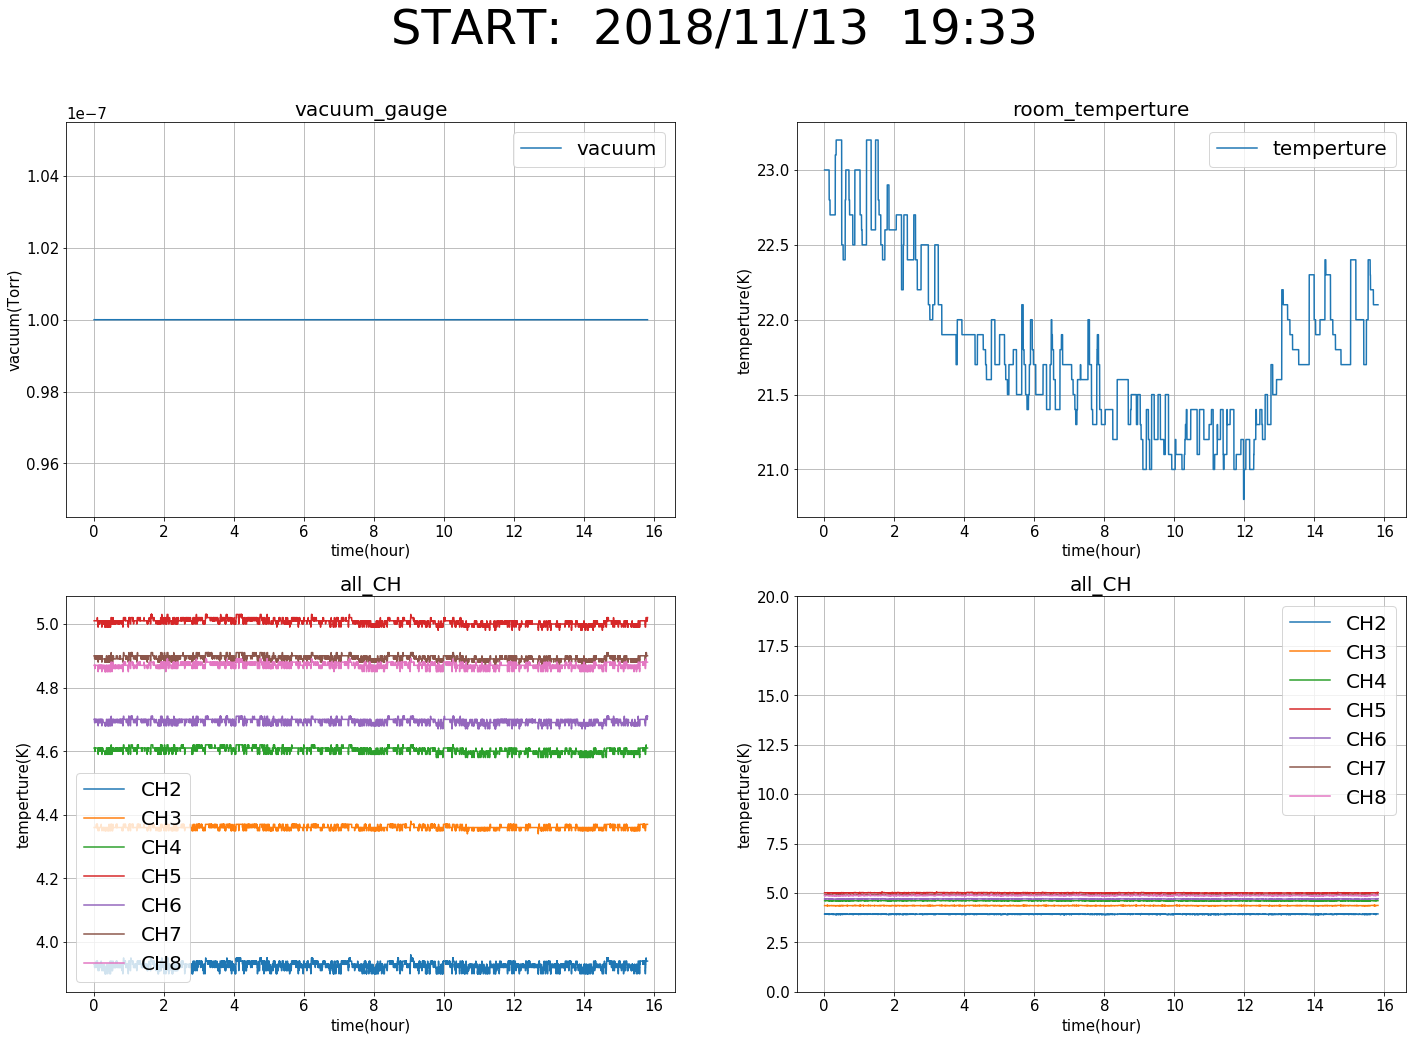

In [664]:
fig = plt.figure(figsize=(6*4, 4*4)) 

matplotlib.rcParams['font.size'] = 20

status = ['vacuum','temperture']
unit = ['(Torr)','(K)']
title = ['vacuum_gauge','room_temperture']
CH_list = ['CH2','CH3','CH4','CH5','CH6','CH7','CH8']
ax = [fig.add_subplot(2,2,i) for i in range(1,len(status)+3)]

#70K 以下制限
ex = status_list[status_list['CH4']<70]

for status, _ax , _unit, _title in zip(status, ax , unit, title):
    _ax.plot(status_list['time'], status_list[status], label = status)
    _ax.grid()
    _ax.set_xlabel('time(hour)',size = 15)
    _ax.set_ylabel(status+_unit,size = 15)
    _ax.set_title(_title,size = 20)
    _ax.legend()

ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
[ax3.plot(status_list['time'],status_list[i],label = i) for i in CH_list]
ax3.grid()
ax3.set_xlabel('time(hour)',size = 15)
ax3.set_ylabel('temperture(K)', size = 15)
ax3.set_title('all_CH',size = 20)
ax3.legend()
[ax4.plot(ex['time'],ex[i],label = i) for i in CH_list]
ax4.grid()
ax4.set_xlabel('time(hour)',size = 15)
ax4.set_ylabel('temperture(K)', size = 15)
ax4.set_ylim(0,20)
ax4.set_title('all_CH',size = 20)
ax4.legend(loc = 'upper right')
fig.suptitle( 'START:  '+D, size=48)

plt.show()

1        23.0
2        23.0
3        23.0
4        23.0
5        23.0
6        23.0
7        23.0
8        23.0
9        23.0
10       23.0
11       23.0
12       23.0
13       23.0
14       23.0
15       23.0
16       23.0
17       23.0
18       23.0
19       23.0
20       23.0
21       23.0
22       23.0
23       23.0
24       23.0
25       23.0
26       23.0
27       23.0
28       23.0
29       23.0
30       23.0
         ... 
56812    22.1
56813    22.1
56814    22.1
56815    22.1
56816    22.1
56817    22.1
56818    22.1
56819    22.1
56820    22.1
56821    22.1
56822    22.1
56823    22.1
56824    22.1
56825    22.1
56826    22.1
56827    22.1
56828    22.1
56829    22.1
56830    22.1
56831    22.1
56832    22.1
56833    22.1
56834    22.1
56835    22.1
56836    22.1
56837    22.1
56838    22.1
56839    22.1
56840    22.1
56841    22.1
Name: temperture, Length: 56841, dtype: float64